In [18]:
from stl import mesh
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.pyplot as plt
import numpy as np

# load STL file and convert mesh data to plot data
mesh = mesh.Mesh.from_file('ConstrainedPlanningSphere_obstacle.stl')

def cuboid(o, size=(1,1,1)):
    X = [[[0, 1, 0], [0, 0, 0], [1, 0, 0], [1, 1, 0]],
         [[0, 0, 0], [0, 0, 1], [1, 0, 1], [1, 0, 0]],
         [[1, 0, 1], [1, 0, 0], [1, 1, 0], [1, 1, 1]],
         [[0, 0, 1], [0, 0, 0], [0, 1, 0], [0, 1, 1]],
         [[0, 1, 0], [0, 1, 1], [1, 1, 1], [1, 1, 0]],
         [[0, 1, 1], [0, 0, 1], [1, 0, 1], [1, 1, 1]]]
    X = np.array(X).astype(float)
    for i in range(3):
        X[:,:,i] *= size[i]
    X += np.array(o)
    return X

def plotCube3D(position, size, color, **kwargs):
    return Poly3DCollection(cuboid(position, size), facecolors=color, **kwargs)

 ### 問題設定
 - 拘束条件：半径1の球面上
 - スタート位置：$(x, y, z) = (0, 0, 1)$
 - ゴール位置：$(x, y, z) = (0, 0, -1)$

 ### 生成された軌道（後処理なし）

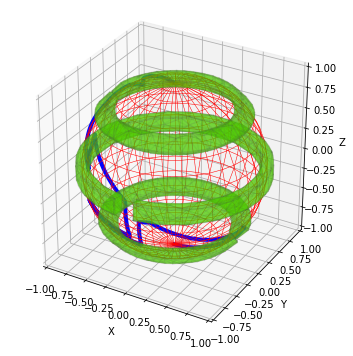

In [19]:
# figure settings
xmin,xmax=-1,1
ymin,ymax=-1,1
zmin,zmax=-1,1

fig = plt.figure(figsize=(6,6))
ax = fig.gca(projection='3d')
ax.set_box_aspect((1,1,1))
ax.set_xlim3d(xmin, xmax)
ax.set_ylim3d(ymin, ymax)
ax.set_zlim3d(zmin, zmax)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# plot constraint 
radius = 1.0
u,v=np.mgrid[0:2*np.pi:40j, 0:np.pi:20j]
x=radius*np.cos(u)*np.sin(v)
y=radius*np.sin(u)*np.sin(v)
z=radius*np.cos(v)
ax.plot_wireframe(x, y, z, color='r', linewidth=0.5)

# plot obstacle mesh data
ax.add_collection3d(Poly3DCollection(mesh.vectors, 
                    facecolors=[0.3,0.8,0,0.5], edgecolor=[0.3,0.3,0.3,0.1]))

# plot path
data = np.loadtxt('path.txt')
ax.plot(data[:,0],data[:,1],data[:,2],color='b',linewidth=4)

plt.show()

 ### 生成された軌道（後処理あり）

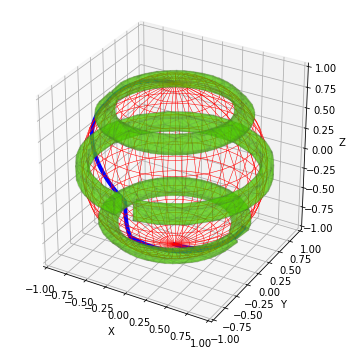

In [20]:
# figure settings
fig = plt.figure(figsize=(6,6))
ax = fig.gca(projection='3d')
ax.set_box_aspect((1,1,1))
ax.set_xlim3d(xmin, xmax)
ax.set_ylim3d(ymin, ymax)
ax.set_zlim3d(zmin, zmax)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# plot constraint
radius = 1.0
u,v=np.mgrid[0:2*np.pi:40j, 0:np.pi:20j]
x=radius*np.cos(u)*np.sin(v)
y=radius*np.sin(u)*np.sin(v)
z=radius*np.cos(v)
ax.plot_wireframe(x, y, z, color='r', linewidth=0.5)

# plot obstacle mesh data
ax.add_collection3d(Poly3DCollection(mesh.vectors, 
                    facecolors=[0.3,0.8,0,0.5], edgecolor=[0.3,0.3,0.3,0.1]))

# plot path
data = np.loadtxt('simplepath.txt')
ax.plot(data[:,0],data[:,1],data[:,2],color='b',linewidth=4)

plt.show()